**Note: Distances between stations are measured in miles. (pedestrian distance)

import

In [43]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

task 1

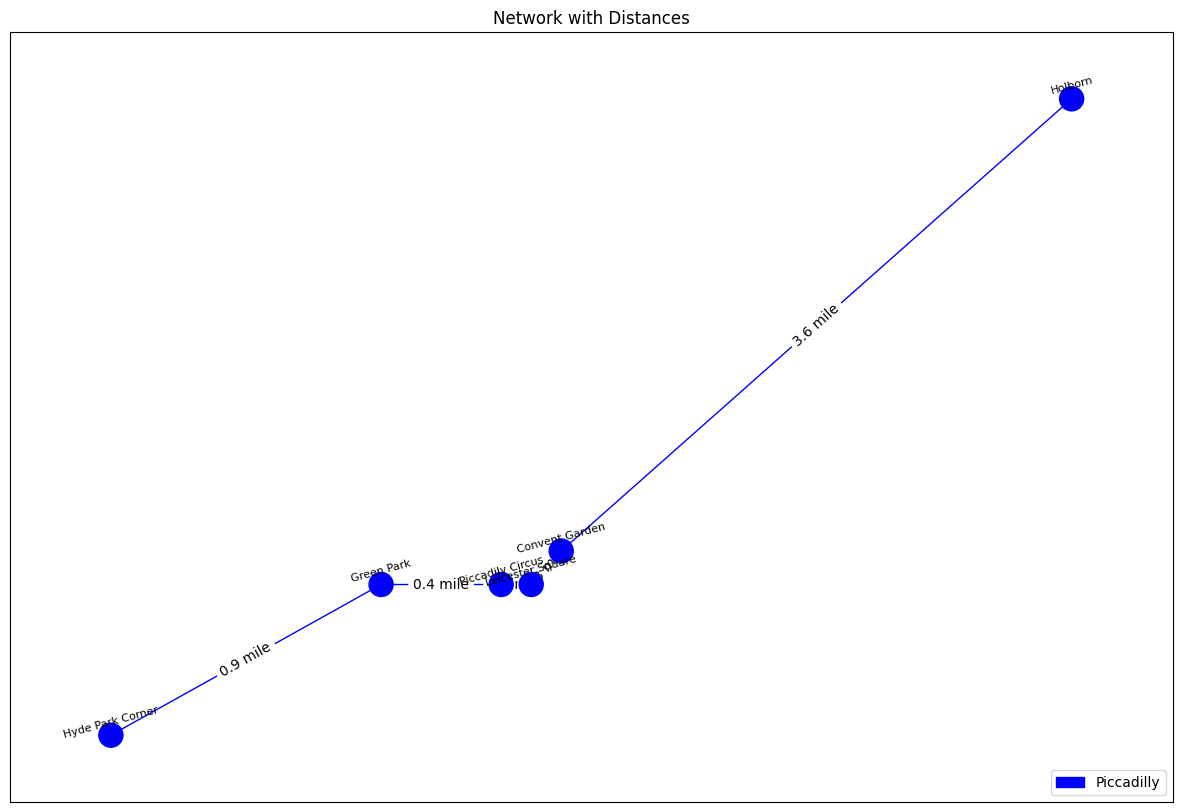

In [44]:
import matplotlib.patches as mpatches
import networkx as nx
import matplotlib.pyplot as plt


Graph = nx.Graph()

Graph.add_node('Hyde Park Corner', npos=(0, 0), ccn='#0000ff')
Graph.add_node('Green Park', npos=(9, 9), ccn='#0000ff')
Graph.add_node('Piccadily Circus', npos=(13, 9), ccn='#0000ff')
Graph.add_node('Leicester Square', npos=(14, 9), ccn='#0000ff')
Graph.add_node('Convent Garden', npos=(15, 11), ccn='#0000ff')
Graph.add_node('Holborn', npos=(32, 38), ccn='#0000ff')

distances = {
    ('Hyde Park Corner', 'Green Park'): 0.9,
    ('Green Park', 'Piccadily Circus'): 0.4,
    ('Piccadily Circus', 'Leicester Square'): 0.1,
    ('Leicester Square', 'Convent Garden'): 0.3,
    ('Convent Garden', 'Holborn'): 3.6,
}

for (u, v), d in distances.items():
    Graph.add_edge(u, v, cce='#0000FF', distance=d)

# Get node and edge attributes
pos = nx.get_node_attributes(Graph, 'npos')
nodecolour = nx.get_node_attributes(Graph, 'ccn')
edgecolour = nx.get_edge_attributes(Graph, 'cce')
distances = nx.get_edge_attributes(Graph, 'distance')

nodearray = list(nodecolour.values())
edgearray = list(edgecolour.values())

plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(Graph, pos, node_color=nodearray)
nx.draw_networkx_edges(Graph, pos, edge_color=edgearray)

labels = {node: node for node in Graph.nodes()}
label_pos = {node: (x, y + 0.8) for (node, (x, y)) in pos.items()}

for node, (x, y) in label_pos.items():
    plt.text(x, y, node, fontsize=8, rotation=15, ha='center', va='center')

edge_labels = {(u, v): f'{d} mile' for (u, v), d in distances.items()}
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_labels)

# Add title
plt.title("Network with Distances")

# Create the legend
blue_line = mpatches.Patch(color='#0000ff', label='Piccadilly')

# Place the legend in the bottom right corner
plt.legend(handles=[blue_line], loc='lower right')

# Show the plot
plt.show()


task 2

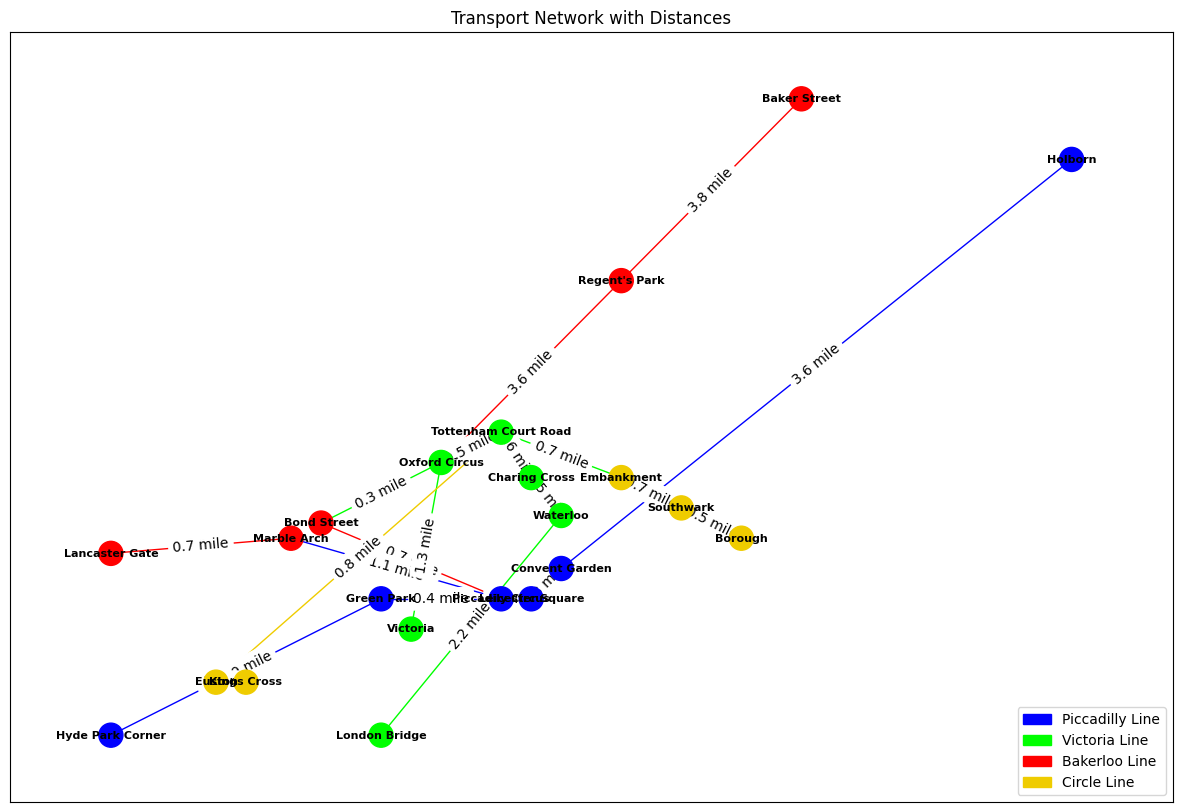

In [45]:
import matplotlib.patches as mpatches
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
Graph = nx.Graph()

# Define nodes with their positions and line colors
stations = {
    'Hyde Park Corner': (0, 0),
     'Green Park': (9, 9), 
    'Piccadily Circus': (13, 9),
    'Leicester Square': (14, 9), 
    'Convent Garden': (15, 11), 
    'Holborn': (32, 38),

    'Victoria': (10,7),
     'Oxford Circus': (11, 18), 
    'Tottenham Court Road': (13, 20),
    'Charing Cross': (14, 17),
     'Waterloo': (15, 14.5),
     'London Bridge': (9, 0),

    'Baker Street': (23, 42), 
    'Regent\'s Park': (17, 30), 
    'Bond Street': (7, 14),
    'Marble Arch': (6, 13),
     'Lancaster Gate': (0, 12),

    'Kings Cross': (4.5, 3.5),
     'Euston': (3.5, 3.5),
     'Embankment': (17 ,17),
    'Southwark': (19, 15), 
    'Borough': (21, 13),
}

# Define distances between connected stations
distances = {
    # Piccadilly line
    ('Hyde Park Corner', 'Green Park'): 0.9,
    ('Green Park', 'Piccadily Circus'): 0.4,
    ('Piccadily Circus', 'Leicester Square'): 0.1,
    ('Leicester Square', 'Convent Garden'): 0.3,
    ('Convent Garden', 'Holborn'): 3.6,

    # Victoria line
    ('Victoria', 'Oxford Circus'): 1.3,
    ('Oxford Circus', 'Tottenham Court Road'): 0.5,
    ('Tottenham Court Road', 'Charing Cross'): 0.6,
    ('Charing Cross', 'Waterloo'): 0.5,
    ('Waterloo', 'London Bridge'): 2.2,

    # Bakerloo line
    ('Baker Street', 'Regent\'s Park'): 3.8,
    ('Regent\'s Park', 'Oxford Circus'): 3.6,
    ('Oxford Circus', 'Bond Street'): 0.3,
    ('Bond Street',  'Piccadily Circus'): 0.7,
    ('Piccadily Circus',  'Marble Arch'): 1.1,
    ('Marble Arch', 'Lancaster Gate'): 0.7,

    # Circle line
    ('Kings Cross', 'Euston'): 1.2,
    ('Euston', 'Tottenham Court Road'): 0.8,
    ('Tottenham Court Road', 'Embankment'): 0.7,
    ('Embankment', 'Southwark'): 0.7,
    ('Southwark', 'Borough'): 0.5,
}

for station, pos in stations.items():
    if station in ['Hyde Park Corner', 'Green Park', 'Piccadily Circus', 'Leicester Square', 'Convent Garden', 'Holborn']:
        color = '#0000ff'  # blue
    elif station in ['Victoria', 'Oxford Circus', 'Tottenham Court Road', 'Charing Cross', 'Waterloo', 'London Bridge']:
        color = '#00FF00'  # green
    elif station in ['Baker Street', 'Regent\'s Park', 'Bond Street', 'Marble Arch', 'Lancaster Gate']:
        color = '#FF0000'  # red
    elif station in ['Kings Cross', 'Euston', 'Tottenham Court Road', 'Embankment', 'Southwark', 'Borough']:
        color = '#EFCC00'  # yellow
    else:
        color = '#888888'  # Default color

    Graph.add_node(station, npos=pos, ccn=color)

for (u, v), d in distances.items():
    line_color = nx.get_node_attributes(Graph, 'ccn').get(u, '#888888')
    Graph.add_edge(u, v, cce=line_color, distance=d)

pos = nx.get_node_attributes(Graph, 'npos')
nodecolor = nx.get_node_attributes(Graph, 'ccn')
edgecolor = nx.get_edge_attributes(Graph, 'cce')
distances = nx.get_edge_attributes(Graph, 'distance')

plt.figure(figsize=(15, 10))

# Draw nodes and edges
nx.draw_networkx_nodes(Graph, pos, node_color=list(nodecolor.values()))
nx.draw_networkx_edges(Graph, pos, edge_color=list(edgecolor.values()))
nx.draw_networkx_labels(Graph, pos, labels={node: node for node in Graph.nodes()}, font_size=8, font_weight='bold')

# Draw edge labels
edge_labels = {(u, v): f'{d} mile' for (u, v), d in distances.items()}
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_labels)

plt.title("Transport Network with Distances")

# Create the keys
legend_patches = [
    mpatches.Patch(color='#0000ff', label='Piccadilly Line'),
    mpatches.Patch(color='#00FF00', label='Victoria Line'),
    mpatches.Patch(color='#FF0000', label='Bakerloo Line'),
    mpatches.Patch(color='#EFCC00', label='Circle Line')
]
plt.legend(handles=legend_patches, loc='lower right')
plt.show()


task 3

In [46]:

distances = nx.get_edge_attributes(Graph, 'distance')
distance_values = list(distances.values())

# Total length of the transport network
total_length = round(sum(distance_values), 2)

# Average distance between the stations
average_distance = round(np.mean(distance_values), 2)

# Standard deviation of the distances between the stations
std_deviation = round(np.std(distance_values), 2)

print(f"Total length of the transport network: {total_length} miles")
print(f"Average distance between the stations: {average_distance} miles")
print(f"Standard deviation of the distances between the stations: {std_deviation} miles")


Total length of the transport network: 24.5 miles
Average distance between the stations: 1.17 miles
Standard deviation of the distances between the stations: 1.11 miles
